In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def predict(weights, bias, X):
    return sigmoid(np.sum(X*weights, axis=1)+bias)
    
def get_NLL(weights, bias, X, y):
    pred = predict(weights, bias, X)
    return -np.sum( np.log(y*pred + (1-y)*(1-pred)   ) )

def get_dNLL_dw(weights, bias, X, y):
    pred = predict(weights, bias, X)
    X_ = np.hstack((X, np.ones((X.shape[0], 1))))
    d_ = (X_.T@(pred - y))/(X.shape[0])
    return d_[:-1], d_[-1]

def MSE(preds, y):
    return np.mean((y-preds)**2)

def accuracy(preds, y):
    return np.mean(y==np.round(preds))

In [ ]:
iterations = 100
lr = 0.1
X = np.random.rand(4, 5)
y = np.round(np.random.rand(4))

In [ ]:
def run_LR(iterations, lr, X_train, y_train, X_test, y_test):
    weights = np.random.rand(X_train.shape[1])-1
    bias = np.random.rand(1)-1
    losses = []
    accuracies = []
    for it in range(iterations):
        preds = predict(weights, bias, X_train)
        MSE_train = MSE(preds, y_train)
        preds_test = predict(weights, bias, X_test)
        MSE_test = MSE(preds_test, y_test)
        
        acc_train = accuracy(preds, y_train)
        acc_test = accuracy(preds_test, y_test)
        nll = get_NLL(weights, bias, X_train, y_train)
        d_w, d_b = get_dNLL_dw(weights, bias, X_train, y_train)
        
        weights -= lr*d_w
        bias    -= lr*d_b
        
        losses.append(nll)
        accuracies.append(acc_test)
        print(f"acc_train: {acc_train}, acc_test: {acc_test}, MSE_train: {MSE_train}, MSE_test: {MSE_test}, NLL: {nll}")
    return accuracies, losses
run_LR(iterations, lr, X, y, X, y)

In [ ]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin']

df = pd.read_csv('auto.data', names=cols, na_values = "?",
                comment = '\t', # once the program encounters a \t then the rest of the line would be ignored by the function
                sep= " ",
                skipinitialspace=True)
df = df.iloc[1: , :]
data = df.copy()
data['MPG']= pd.to_numeric(data['MPG'])

median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
#data[cols] = data[cols].applymap(np.int32)

data

In [ ]:
X_ = data[['Horsepower', 'Weight', 'Year']].values
X = (X_-X_.mean(axis=0))/X_.std(axis=0)
y = (data['MPG'].values>=23).astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [ ]:
accuracies, losses = run_LR(iterations=1000, lr=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test) 
max(accuracies)

Text(0.5, 0, 'NLL')

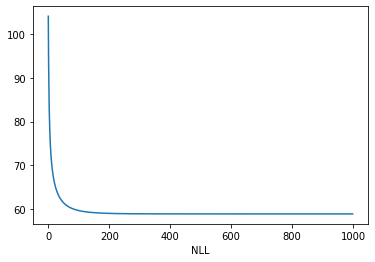

In [ ]:
# 2.
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Iteration (T)")
plt.xlabel("NLL")
# the loss of (t+1) should be lower than the loss of (t) because gradient descent works by changing the weights 
# and bias in such a way that the loss function is minimised. This means every iterations the gradients and
# bias are changed to reduce the loss function. This is why the loss function value decreases each iteration. 


### 3
The model is not able to be ran without normalisation, as this causes numerical stability: The numbers are so large in the dataset, that the predictions in the first iterations is set to a probability of 1 (because the number being entered into the sigmoid is so high). This results in an inf in the NLL function, meaning the algorithm cannot function.

In [ ]:
dummies_origin = pd.get_dummies(data["Origin"]).values

X_ = data[['Horsepower', 'Weight', 'Year']].values
# X = (X_-X_.mean(axis=0))/X_.std(axis=0)
X = np.hstack((X_, dummies_origin))
y = (data['MPG'].values>=23).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)
accuracies, losses = run_LR(iterations=1000, 
                lr=0.01, 
                X_train=X_train, 
                y_train=y_train, 
                X_test=X_test, 
                y_test=y_test)
max(accuracies)

The model does not work without normalisation due to numerical instability because of the large values in the data. 

In [ ]:
X_ = data[['Horsepower', 'Weight', 'Year']].values
X = (X_-X_.mean(axis=0))/X_.std(axis=0)
X = np.hstack((X, dummies_origin))
y = (data['MPG'].values>=23).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)
accuracies, losses = run_LR(iterations=1000, 
                lr=0.01, 
                X_train=X_train, 
                y_train=y_train, 
                X_test=X_test, 
                y_test=y_test)
max(accuracies)

In [ ]:
X_ = data[['Horsepower', 'Weight', 'Year']].values
X = (X_-X_.mean(axis=0))/X_.std(axis=0)
X = np.hstack((X, dummies_origin))
y = (data['MPG'].values>=23).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [ ]:
accuracies, losses = run_LR(iterations=1000, 
                lr=0.01, 
                X_train=X_train, 
                y_train=y_train, 
                X_test=X_test, 
                y_test=y_test)
max(accuracies)

On a previous run not shown here:
When origin is taken into account, the test accuracy is 94%, whilst it is 93% when origin is not taken into account. This implies that origin makes a small negative difference in the accuracy of the classifier. This is an interesting an unxpected result, as one would think that with more information the classifier would do better. Potentially the inclusion of origin is incouraging the model to overfit. It may also be the case that origin has no bearing at all of mpg, and therefore the inclusion of three extra dimensions adds more complexity to the model without adding any useful information, therefore making the task of the model to find useful signal much harder.  

On the run shown here, origin makes no difference to the result of the classifier, implying that origin has no effect on the mpg.

## 4. 

In [ ]:
def run_LR_weights_bias(iterations, lr, X_train, y_train, X_test, y_test, weights, bias, verbose=False):
   
    losses = []
    training_accuracies = []
    accuracies = []
    for it in range(iterations):
        preds = predict(weights, bias, X_train)
        MSE_train = MSE(preds, y_train)
        preds_test = predict(weights, bias, X_test)
        MSE_test = MSE(preds_test, y_test)
        
        acc_train = accuracy(preds, y_train)
        acc_test = accuracy(preds_test, y_test)
        nll = get_NLL(weights, bias, X_train, y_train)
        d_w, d_b = get_dNLL_dw(weights, bias, X_train, y_train)
        
        weights -= lr*d_w
        bias    -= lr*d_b
        
        losses.append(nll)
        accuracies.append(acc_test)
        training_accuracies.append(acc_train)
        if verbose:
            print(f"acc_train: {acc_train}, acc_test: {acc_test}, MSE_train: {MSE_train}, MSE_test: {MSE_test}, NLL: {nll}")
    return training_accuracies, accuracies, losses



In [ ]:
weights = np.random.normal(size=X_train.shape[1], loc=0, scale=0.7)
bias = np.random.normal(size=1, loc=0, scale=0.7)

In [ ]:
from copy import copy
seeds = np.arange(10)
error_rates = []
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)
    _, accuracies, losses = run_LR_weights_bias(iterations=1000, 
                lr=0.1, 
                X_train=X_train, 
                y_train=y_train, 
                X_test=X_test, 
                y_test=y_test,
                weights=copy(weights), 
                bias=copy(bias))
    argmin = np.argmin(losses)
    error_rate = 1-accuracies[argmin]
    print("Error rate: ", error_rate)
    error_rates.append(error_rate)
print("")
print("Mean of the error rates: ", np.mean(error_rates))
print("Var of the error rates: ", np.std(error_rates)**2)

Error rate:  0.10050251256281406
Error rate:  0.085427135678392
Error rate:  0.10050251256281406
Error rate:  0.11557788944723613
Error rate:  0.10050251256281406
Error rate:  0.085427135678392
Error rate:  0.11055276381909551
Error rate:  0.11557788944723613
Error rate:  0.09045226130653261
Error rate:  0.10050251256281406

Mean of the error rates:  0.10050251256281406
Var of the error rates:  0.00011110830534582422


It can be seen that the variance of the error rates is extremely low. This means the model is very consistent across different runs. The model has an error rate of about 10%, whether this is 'good' or not depends on the specific application and would need input from a domain expert. However it is encouraging to see that the model has low variance as this ones one can be confident that the model would continue to behave this way if used in the real world. 

In [ ]:
epochs = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]
out = []
for ind, lr in enumerate(learning_rates):
    print(f"\rDoing {ind}/10", end="")
    for iteration in epochs:
        
        training_accuracies, accuracies, losses = run_LR_weights_bias(iterations=iteration, 
                                                 lr=lr, 
                                                 X_train=X_train, 
                                                 y_train=y_train, 
                                                 X_test=X_test, 
                                                 y_test=y_test,
                                                 weights=copy(weights), 
                                                 bias=copy(bias))
        argmin = np.argmin(losses)
        error_rate_train = 1-training_accuracies[argmin]
        error_rate = 1-accuracies[argmin]
        
        out.append([lr, iteration, error_rate_train, error_rate])

Doing 9/10

In [ ]:
out

In [ ]:
arg = np.argmin(np.array(out)[:, 3])
print(arg)
np.array(out)[arg, :]

29


array([1.00000000e-02, 1.00000000e+04, 9.04522613e-02, 1.00502513e-01])

The best test error rate happens with a lr=5.00000000e-03 and 5000 epochs.


In [ ]:
arg = np.argmin(np.array(out)[:, 2])
print(arg)

19


Yes, the min train error and test error happens with the same combination of learning rate and iterations. If the learning rate is too big, the algorithm will be taking too bigger steps on the gradient descent updating process. This can lead to the algorithm jumping over the minimum, and can lead to numerical instability. This can result in inf values being produces, which produces run time warnings. It also leads to lower error rates.  

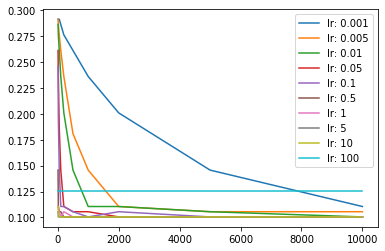

In [ ]:
out = np.array(out)
for i, lr in zip(range(10), learning_rates):
    plt.plot(out[i*10:i*10+10, 1], out[i*10:i*10+10, 3], label = f"lr: {lr}")
plt.legend()

6.


In [ ]:
lr = 5e-3 
iterations = 5000
losses_ = []
train_ers = []
test_ers = []
for i in range(10):
    weights = np.random.normal(size=X_train.shape[1], loc=0, scale=0.7)
    bias = np.random.normal(size=1, loc=0, scale=0.7)
    training_accuracies, accuracies, losses = run_LR_weights_bias(iterations, 
                                                                  lr, 
                                                                  X_train, 
                                                                  y_train, 
                                                                  X_test, 
                                                                  y_test, 
                                                                  weights, 
                                                                  bias, 
                                                                  verbose=False)
    losses_.append(losses)
    arg = np.argmin(losses)
    train_er = 1-training_accuracies[arg]
    test_er = 1-accuracies[arg]
    
    train_ers.append(train_er)
    test_ers.append(test_er)

Text(0, 0.5, 'Error rate')

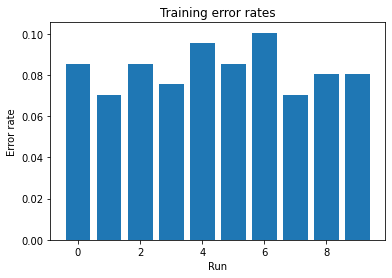

In [ ]:
plt.title("Training error rates")
plt.bar(x=np.arange(10), height =train_ers)

plt.xlabel("Run")
plt.ylabel("Error rate")

Text(0, 0.5, 'Error rate')

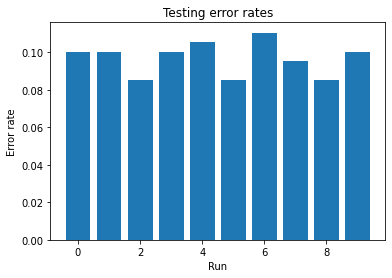

In [ ]:
plt.title("Testing error rates")
plt.bar(x=np.arange(10), height =test_ers)

plt.xlabel("Run")
plt.ylabel("Error rate")

Text(0, 0.5, 'NLL')

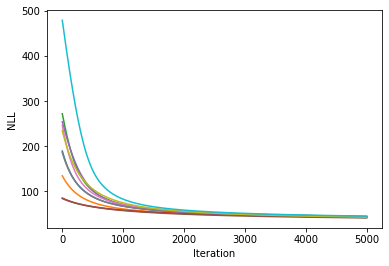

In [ ]:
for item in losses_:
    plt.plot(item)
plt.xlabel("Iteration")
plt.ylabel("NLL")

We can conclude that changing the intial weights can make a difference over the final error rates. Infact we can see that there is a difference of up to 4%, 7% min and 11% max. We can see that at the start, the first 1000 iterations, there are vast differences in the NLL between different starting weights. Clearly, the initial guess of weights makes a huge difference. However, after 2000, there are all almost the same. This is because the gradient descent reduces the error by a magnitude of the error. In other words, the greater the error, the quicker it will be reduced. 
